<center><h1 style="background-color:yellow">Challenge</h1></center>

<hr>

We would like for you to devise an approach to balance the sampled dataset of people in demographic attributes.csv on each demographic category; i.e., the goal here is to compute a set of person {level weights (one single weight per person) that unbiases the dataset.

## Python Libraries

In [1]:
## Library to get rid of warnings - to make output human readable
import warnings
warnings.filterwarnings("ignore")

## To manipulate CSV and Excel files
import pandas as pd

## For visualization
from matplotlib import pyplot as plt

## Load Data

In [2]:
# Load data and show it first 10 records
demographic_attributes = pd.read_csv("demographic_attributes.csv")
demographic_attributes.head(10)

,person id,age,education,ethnicity
0,0,75_84,Some College,white
1,1,85_120,HS Diploma,white
2,2,25_34,Some College,white
3,3,55_64,HS Diploma,black
4,4,45_54,Bachelor Degree,white
5,5,25_34,HS Diploma,white
6,6,55_64,Some College,white
7,7,45_54,HS Diploma,white
8,8,18_24,Some College,white
9,9,75_84,Some College,white


In [3]:
# Load dataset and show the data
demo_ground_truth_csv = pd.read_csv("demo_ground_truth_csv.csv")
demo_ground_truth_csv

,demographic category,number of individuals
0,18_24,11839159
1,25_34,16399632
2,35_44,15335704
3,45_54,16430762
4,55_64,15148777
5,65_74,9990412
6,75_84,5221430
7,0_4,7500407
8,5_9,7748669
9,10_14,7815759


## Exploratory Data Analysis

In [4]:
print('Information of Demographic Attributes Dataset')
print("---------------------------------------------")
demographic_attributes.info()

Information of Demographic Attributes Dataset
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person id  400000 non-null  int64 
 1   age        400000 non-null  object
 2   education  377810 non-null  object
 3   ethnicity  400000 non-null  object
dtypes: int64(1), object(3)
memory usage: 12.2+ MB


You can see in above dataset, the column `education` contain Null values, let check those records.

In [5]:
print("There are {} person whose education is unknown".format(demographic_attributes[demographic_attributes["education"].isna()].shape[0]))
print("Those values should be filled before doing any further analysis")
print("Following are the records where education is missing")
demographic_attributes[demographic_attributes["education"].isna()]

There are 22190 person whose education is unknown
Those values should be filled before doing any further analysis
Following are the records where education is missing


,person id,age,education,ethnicity
18,18,65_74,NaN,white
31,31,25_34,NaN,white
38,38,65_74,NaN,white
92,92,45_54,NaN,white
93,93,35_44,NaN,white
...,...,...,...,...
399900,399900,35_44,NaN,white
399901,399901,65_74,NaN,white
399902,399902,65_74,NaN,white
399949,399949,45_54,NaN,hispanic


In [6]:
print('There are total {} persons in this dataset'.format(demographic_attributes.shape[0]))

There are total 400000 persons in this dataset


Text(0.5, 1.0, 'Age Wise Viewership')

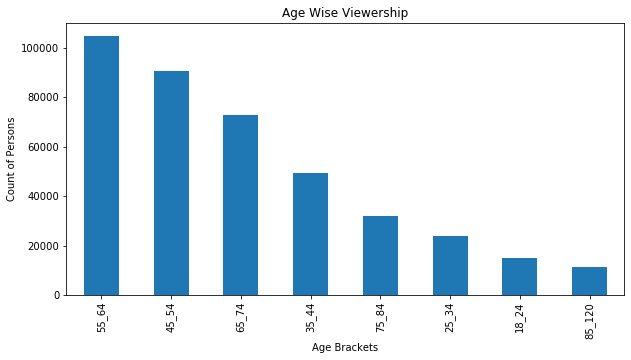

In [7]:
plt.figure(figsize=(10, 5))
demographic_attributes["age"].value_counts().plot.bar()
plt.ylabel("Count of Persons")
plt.xlabel("Age Brackets")
plt.title("Age Wise Viewership")

Above figure shows that most of the users in dataset are in the bracket of `55-64` and then `45-54` and so on. The data is baised towards higher age groups.

Text(0.5, 1.0, 'Education Wise Viewership')

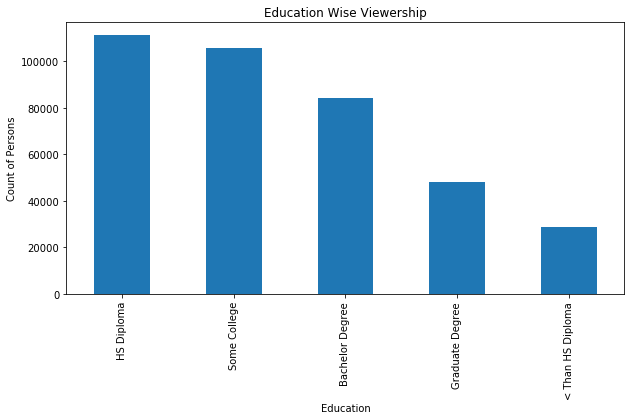

In [8]:
plt.figure(figsize=(10, 5))
demographic_attributes["education"].value_counts().plot.bar()
plt.ylabel("Count of Persons")
plt.xlabel("Education")
plt.title("Education Wise Viewership")

Text(0.5, 1.0, 'Ethnicity Wise Viewership')

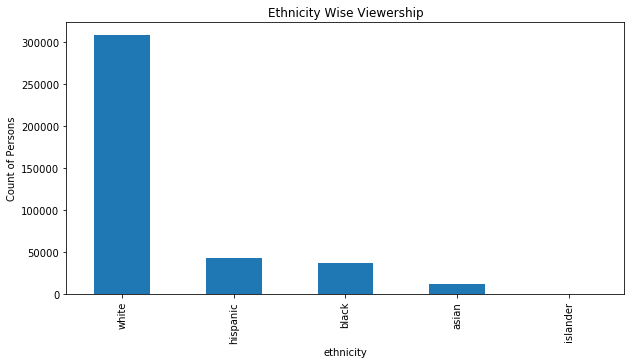

In [9]:
plt.figure(figsize=(10, 5))
demographic_attributes["ethnicity"].value_counts().plot.bar()
plt.ylabel("Count of Persons")
plt.xlabel("ethnicity")
plt.title("Ethnicity Wise Viewership")

## Show data w.r.t to each Ethenic Type

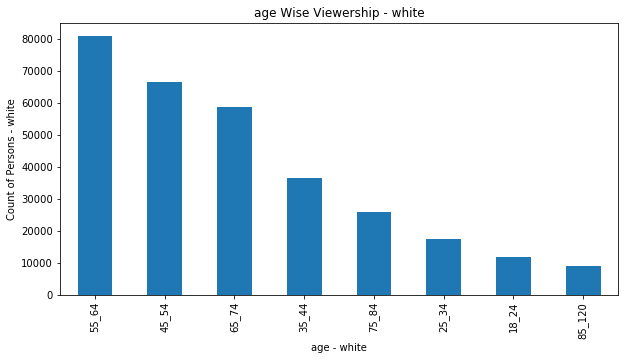

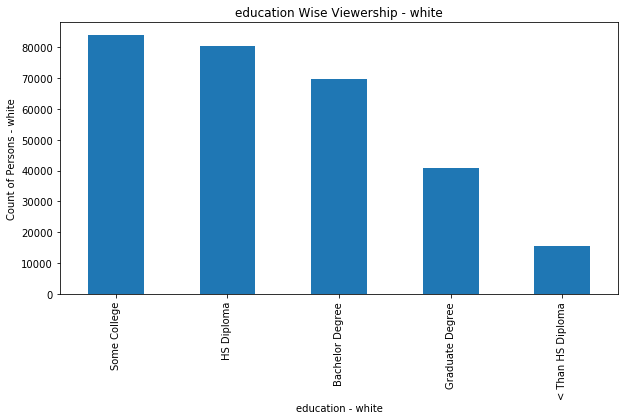

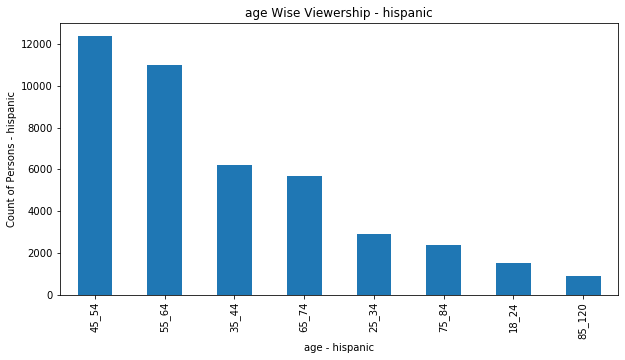

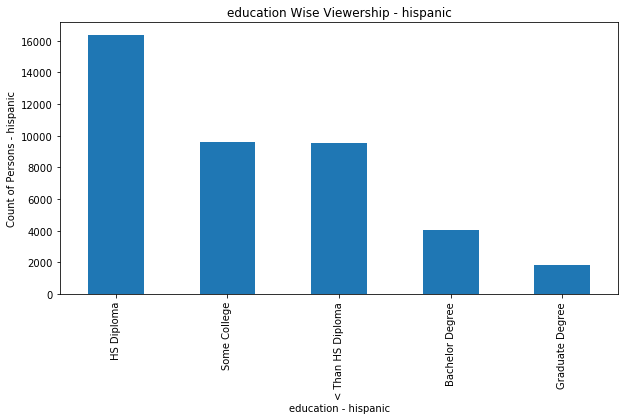

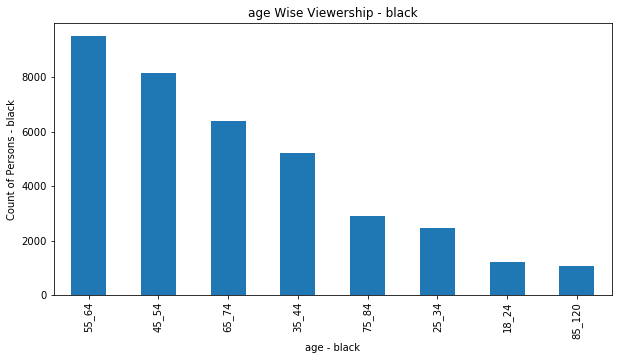

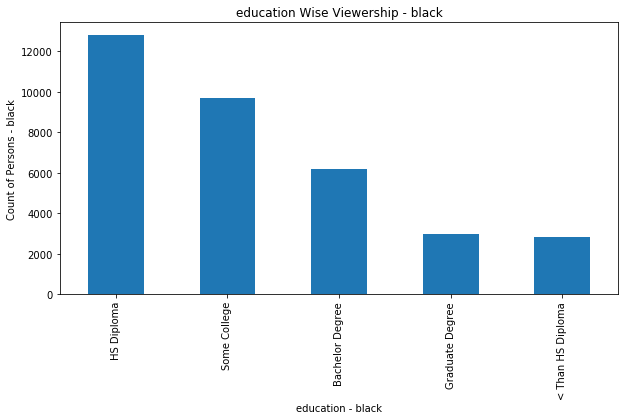

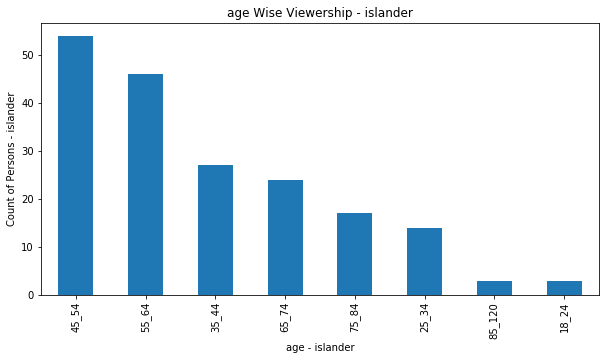

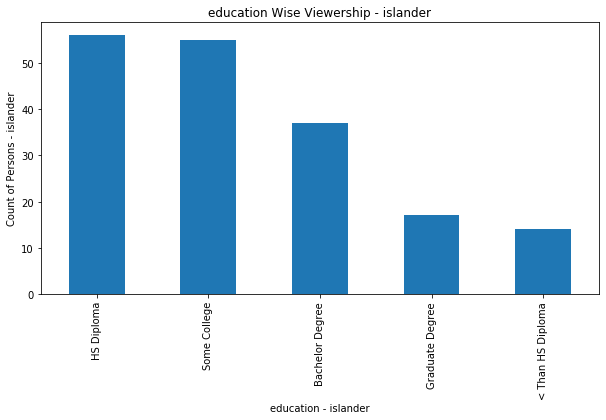

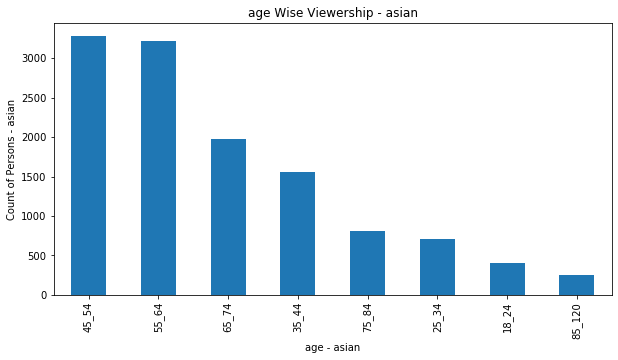

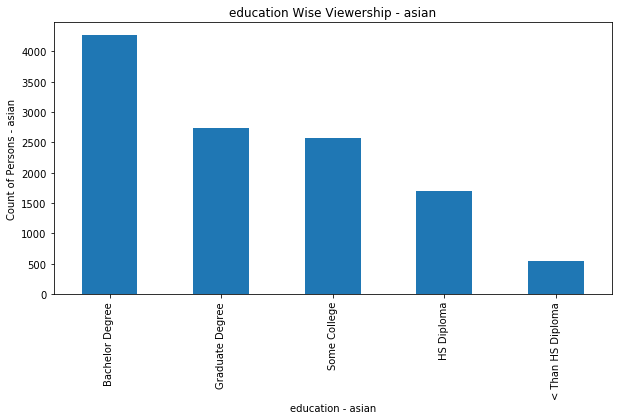

In [10]:
for ethnic in set(demographic_attributes['ethnicity'].values.tolist()):
    data = demographic_attributes[demographic_attributes["ethnicity"] == ethnic]
    for column_name in data.columns:
        if column_name in ["ethnicity", "person id"]:
            continue
        else:
            plt.figure(figsize=(10, 5))
            data[column_name].value_counts().plot.bar()
            plt.ylabel("Count of Persons - "+ethnic)
            plt.xlabel(column_name + " - "+ ethnic)
            plt.title(column_name+" Wise Viewership - "+ethnic)
            plt.show()

## What is Sampling Bias and Weighting Data?

If the data from your survey is analysed unweighted, the results are only representative of the sampled participants. In order to have results that are representative of your entire target population, your data must be weighted. 


## What is a Weight?

A weight is a value given to a data record to adjust the importance given to it in analysis. It may be thought of as the number of persons in the population that are represented by each individual in the sample. Weights are calculated to adjust for the following aspects of a survey.


## What are types of Weigthing Methods?

Following are most widely used data weightage techniques:-

### Sampling Weight
The sample weight is comprised of the inverse of the probability of selection.

### Non Response Weight 
The non-response weight is calculated by taking the inverse of the response rate either for the overall survey or, more often, for each subset of the survey

### Population Weight
The population weight allows for the correction of over- or underrepresentation in the sample of the targeted groups.


<center><h4 style="background-color:yellow">I am using Population Weight</h4></center>

There is one of the method, population table creation and then calculate weightage of each category, will give us a weight that can be used for biased dataset. But we cannot use that as we have dataset (census data), where we have no segregation of categories like how many people who are `male`, `18_24`, `MS` and `Black`. So we cannot use this method. Instead we will calculate the frequency of each category and then average weights of each category such as `age`, `education` and `ethincity` to get final `weight`.

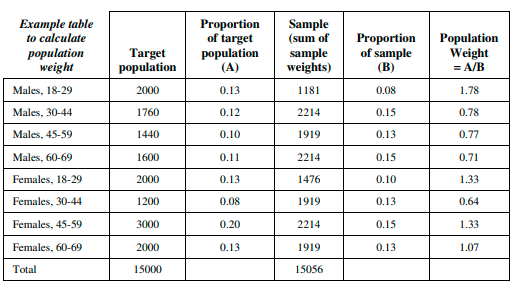

<center>Fig 1. Population Table Example (Not applicable in our case)</center>

I will find the sample frequency and the population for each of the category;


<center><h4 style="background-color:yellow">Frequency Tables for Sample</h4></center>

|Age Group|Count of Samples|
|---|---|
|X1|Y1|
|X2|Y2|

|Education Group|Count of Samples|
|---|---|
|X1|Y1|
|X2|Y2|

|Ethnic Group|Count of Samples|
|---|---|
|X1|Y1|
|X2|Y2|


<center><h4 style="background-color:yellow">Frequency Tables for Population</h4></center>

|Age Group|Count of Population|
|---|---|
|X1|Y1|
|X2|Y2|

|Education Group|Count of Population|
|---|---|
|X1|Y1|
|X2|Y2|

|Ethnic Group|Count of Population|
|---|---|
|X1|Y1|
|X2|Y2|


Then finding the Average weight for sample as well population for each of the person

## Make Frequency Tables for Each Category - Sample Data

In [11]:
# Find total number of perons in specific age group
age_table = demographic_attributes[["person id", "age"]].groupby("age").nunique().reset_index()

# Rename column name for readibility
age_table = age_table.rename(columns={"person id":"age_sample_population"})

# Show data
age_table

,age,age_sample_population
0,18_24,15000
1,25_34,23751
2,35_44,49527
3,45_54,90479
4,55_64,104788
5,65_74,73018
6,75_84,32107
7,85_120,11330


In [12]:
# Fill misisng education value by Unknown
demographic_attributes["education"] = demographic_attributes["education"].fillna(demographic_attributes["education"].mode().values[0])
demographic_attributes.isna().sum()

person id    0
age          0
education    0
ethnicity    0
dtype: int64

In [13]:
# Find total number of perons in specific education group
education_table = demographic_attributes[["person id", "education"]].groupby("education").nunique().reset_index()

# Rename column name for readibility
education_table = education_table.rename(columns={"person id":"education_sample_population"})

# Show data
education_table

,education,education_sample_population
0,< Than HS Diploma,28569
1,Bachelor Degree,84114
2,Graduate Degree,48289
3,HS Diploma,133303
4,Some College,105725


In [14]:
# Find total number of perons in specific ethnic group
ethnicity_table = demographic_attributes[["person id", "ethnicity"]].groupby("ethnicity").nunique().reset_index()

# Rename column name for readibility
ethnicity_table = ethnicity_table.rename(columns={"person id":"ethnicity_sample_population"})

# Show data
ethnicity_table

,ethnicity,ethnicity_sample_population
0,asian,12213
1,black,36940
2,hispanic,42991
3,islander,188
4,white,307668


## Calculate Sample Weight of Each Category - Sample Data

Weight can be simply calculated as:-

$$ \text{Sample Weight} = \frac {Category_{specific}} {\sum Category_{specific}}$$

In [15]:
# Find sample Weights
age_table["age_sample_weight"] = age_table["age_sample_population"] / age_table["age_sample_population"].sum()

# SHow Data
age_table

,age,age_sample_population,age_sample_weight
0,18_24,15000,0.037500
1,25_34,23751,0.059377
2,35_44,49527,0.123817
3,45_54,90479,0.226197
4,55_64,104788,0.261970
5,65_74,73018,0.182545
6,75_84,32107,0.080268
7,85_120,11330,0.028325


In [16]:
# Find sample Weights
education_table["education_sample_weight"] = education_table["education_sample_population"] / education_table["education_sample_population"].sum()

# SHow Data
education_table

,education,education_sample_population,education_sample_weight
0,< Than HS Diploma,28569,0.071422
1,Bachelor Degree,84114,0.210285
2,Graduate Degree,48289,0.120722
3,HS Diploma,133303,0.333257
4,Some College,105725,0.264313


In [17]:
# Find sample Weights
ethnicity_table["ethnicity_sample_weight"] = ethnicity_table["ethnicity_sample_population"] / ethnicity_table["ethnicity_sample_population"].sum()

# Show Data
ethnicity_table

,ethnicity,ethnicity_sample_population,ethnicity_sample_weight
0,asian,12213,0.030533
1,black,36940,0.092350
2,hispanic,42991,0.107478
3,islander,188,0.000470
4,white,307668,0.769170


## Make Frequency Tables - Population

In [18]:
# Take first 12 rows from ground truth data
age_population = demo_ground_truth_csv.head(12)
age_population

,demographic category,number of individuals
0,18_24,11839159
1,25_34,16399632
2,35_44,15335704
3,45_54,16430762
4,55_64,15148777
5,65_74,9990412
6,75_84,5221430
7,0_4,7500407
8,5_9,7748669
9,10_14,7815759


In [19]:
# take education values from ground truth
education_population = demo_ground_truth_csv.tail(10).head(5)
education_population

,demographic category,number of individuals
12,< Than HS Diploma,12274025
13,Bachelor Degree,16305721
14,Graduate Degree,9343192
15,HS Diploma,25799018
16,Some College,28937146


In [20]:
# Take last 5 records
ethnicity_population = demo_ground_truth_csv.tail(5)
ethnicity_population

,demographic category,number of individuals
17,asian,6145151
18,black,14626476
19,hispanic,21953456
20,islander,190389
21,white,73838168


## Calculate Population Weight of Each Category

Weight can be simply calculated as:-

$$ \text{Population Weight} = \frac {Category_{specific}} {\sum Category_{specific}}$$

In [21]:
# Calculate Population Weight using above formula for age
age_population["age_population_weight"] = age_population["number of individuals"] / age_population["number of individuals"].sum()
age_population

,demographic category,number of individuals,age_population_weight
0,18_24,11839159,0.098264
1,25_34,16399632,0.136116
2,35_44,15335704,0.127286
3,45_54,16430762,0.136374
4,55_64,15148777,0.125734
5,65_74,9990412,0.082920
6,75_84,5221430,0.043338
7,0_4,7500407,0.062253
8,5_9,7748669,0.064314
9,10_14,7815759,0.064870


In [22]:
# Calculate Population Weight using above formula for education
education_population["education_population_weight"] = education_population["number of individuals"] / education_population["number of individuals"].sum()

education_population

,demographic category,number of individuals,education_population_weight
12,< Than HS Diploma,12274025,0.132464
13,Bachelor Degree,16305721,0.175975
14,Graduate Degree,9343192,0.100834
15,HS Diploma,25799018,0.278429
16,Some College,28937146,0.312297


In [23]:
# Calculate Population Weight using above formula for Ethnicity
ethnicity_population["ethnicity_population_weight"] = ethnicity_population["number of individuals"] / ethnicity_population["number of individuals"].sum()
ethnicity_population

,demographic category,number of individuals,ethnicity_population_weight
17,asian,6145151,0.052633
18,black,14626476,0.125276
19,hispanic,21953456,0.188032
20,islander,190389,0.001631
21,white,73838168,0.632427


## Merge Sample weights of each Category

In [24]:
# Take sample weights and apend to sample data for easy handling
demographic_attributes = demographic_attributes.merge(age_table[["age","age_sample_weight"]], on="age", how="left")
demographic_attributes = demographic_attributes.merge(education_table[["education","education_sample_weight"]], on="education", how="left")

# Fill values resulted due to misisng values of education
demographic_attributes["education_sample_weight"] = demographic_attributes["education_sample_weight"].fillna(0.0) 

demographic_attributes = demographic_attributes.merge(ethnicity_table[["ethnicity","ethnicity_sample_weight"]], on="ethnicity", how="left")
demographic_attributes

,person id,age,education,ethnicity,age_sample_weight,education_sample_weight,ethnicity_sample_weight
0,0,75_84,Some College,white,0.080268,0.264313,0.769170
1,1,85_120,HS Diploma,white,0.028325,0.333257,0.769170
2,2,25_34,Some College,white,0.059377,0.264313,0.769170
3,3,55_64,HS Diploma,black,0.261970,0.333257,0.092350
4,4,45_54,Bachelor Degree,white,0.226197,0.210285,0.769170
...,...,...,...,...,...,...,...
399995,399995,55_64,HS Diploma,white,0.261970,0.333257,0.769170
399996,399996,45_54,Some College,white,0.226197,0.264313,0.769170
399997,399997,35_44,Bachelor Degree,white,0.123817,0.210285,0.769170
399998,399998,55_64,< Than HS Diploma,hispanic,0.261970,0.071422,0.107478


## Merge Populations weights of each Category

In [25]:
# Take Population weights and apend to sample data for easy handling
demographic_attributes = demographic_attributes.merge(age_population[["demographic category","age_population_weight"]], left_on="age", right_on="demographic category",how="left")
demographic_attributes = demographic_attributes.drop(columns = ["demographic category"])

demographic_attributes = demographic_attributes.merge(education_population[["demographic category","education_population_weight"]], left_on="education", right_on="demographic category", how="left")
demographic_attributes = demographic_attributes.drop(columns = ["demographic category"])

demographic_attributes = demographic_attributes.merge(ethnicity_population[["demographic category","ethnicity_population_weight"]], left_on="ethnicity", right_on="demographic category", how="left")
demographic_attributes = demographic_attributes.drop(columns = ["demographic category"])

demographic_attributes

,person id,age,education,ethnicity,age_sample_weight,education_sample_weight,ethnicity_sample_weight,age_population_weight,education_population_weight,ethnicity_population_weight
0,0,75_84,Some College,white,0.080268,0.264313,0.769170,0.043338,0.312297,0.632427
1,1,85_120,HS Diploma,white,0.028325,0.333257,0.769170,0.019034,0.278429,0.632427
2,2,25_34,Some College,white,0.059377,0.264313,0.769170,0.136116,0.312297,0.632427
3,3,55_64,HS Diploma,black,0.261970,0.333257,0.092350,0.125734,0.278429,0.125276
4,4,45_54,Bachelor Degree,white,0.226197,0.210285,0.769170,0.136374,0.175975,0.632427
...,...,...,...,...,...,...,...,...,...,...
399995,399995,55_64,HS Diploma,white,0.261970,0.333257,0.769170,0.125734,0.278429,0.632427
399996,399996,45_54,Some College,white,0.226197,0.264313,0.769170,0.136374,0.312297,0.632427
399997,399997,35_44,Bachelor Degree,white,0.123817,0.210285,0.769170,0.127286,0.175975,0.632427
399998,399998,55_64,< Than HS Diploma,hispanic,0.261970,0.071422,0.107478,0.125734,0.132464,0.188032


In [26]:
demographic_attributes.isna().sum()

person id                      0
age                            0
education                      0
ethnicity                      0
age_sample_weight              0
education_sample_weight        0
ethnicity_sample_weight        0
age_population_weight          0
education_population_weight    0
ethnicity_population_weight    0
dtype: int64

## Calculate Average Sample Weight

Average weight of sample will be sum of all weigths of each category:-

In [27]:
# Calculate Sample Weight simply average of AGE, EDUCATION AND ETHNICITY
demographic_attributes["sample_weight"] = (demographic_attributes["age_sample_weight"] + demographic_attributes["education_sample_weight"] + demographic_attributes["ethnicity_sample_weight"])/3
demographic_attributes.head()

,person id,age,education,ethnicity,age_sample_weight,education_sample_weight,ethnicity_sample_weight,age_population_weight,education_population_weight,ethnicity_population_weight,sample_weight
0,0,75_84,Some College,white,0.080268,0.264313,0.76917,0.043338,0.312297,0.632427,0.371250
1,1,85_120,HS Diploma,white,0.028325,0.333257,0.76917,0.019034,0.278429,0.632427,0.376918
2,2,25_34,Some College,white,0.059377,0.264313,0.76917,0.136116,0.312297,0.632427,0.364287
3,3,55_64,HS Diploma,black,0.261970,0.333257,0.09235,0.125734,0.278429,0.125276,0.229193
4,4,45_54,Bachelor Degree,white,0.226197,0.210285,0.76917,0.136374,0.175975,0.632427,0.401884


## Calculate Average Population Weight

In [28]:
# Calculate Population Weight simply average of AGE, EDUCATION AND ETHNICITY
demographic_attributes["population_weight"] = (demographic_attributes["age_population_weight"] + demographic_attributes["education_population_weight"] + demographic_attributes["ethnicity_population_weight"])/3
demographic_attributes.head()

,person id,age,education,ethnicity,age_sample_weight,education_sample_weight,ethnicity_sample_weight,age_population_weight,education_population_weight,ethnicity_population_weight,sample_weight,population_weight
0,0,75_84,Some College,white,0.080268,0.264313,0.76917,0.043338,0.312297,0.632427,0.371250,0.329354
1,1,85_120,HS Diploma,white,0.028325,0.333257,0.76917,0.019034,0.278429,0.632427,0.376918,0.309963
2,2,25_34,Some College,white,0.059377,0.264313,0.76917,0.136116,0.312297,0.632427,0.364287,0.360280
3,3,55_64,HS Diploma,black,0.261970,0.333257,0.09235,0.125734,0.278429,0.125276,0.229193,0.176480
4,4,45_54,Bachelor Degree,white,0.226197,0.210285,0.76917,0.136374,0.175975,0.632427,0.401884,0.314926


## Calculate Final Weight for each Person

Final weight per person can be calculated as:-

$$weight = \frac {\text{Sample Weight}} {\text{Population Weight}}$$

In [29]:
# Calculate final weights using above formula
demographic_attributes["weight"] = demographic_attributes["sample_weight"] / demographic_attributes["population_weight"]
demographic_attributes.head()

,person id,age,education,ethnicity,age_sample_weight,education_sample_weight,ethnicity_sample_weight,age_population_weight,education_population_weight,ethnicity_population_weight,sample_weight,population_weight,weight
0,0,75_84,Some College,white,0.080268,0.264313,0.76917,0.043338,0.312297,0.632427,0.371250,0.329354,1.127207
1,1,85_120,HS Diploma,white,0.028325,0.333257,0.76917,0.019034,0.278429,0.632427,0.376918,0.309963,1.216007
2,2,25_34,Some College,white,0.059377,0.264313,0.76917,0.136116,0.312297,0.632427,0.364287,0.360280,1.011121
3,3,55_64,HS Diploma,black,0.261970,0.333257,0.09235,0.125734,0.278429,0.125276,0.229193,0.176480,1.298689
4,4,45_54,Bachelor Degree,white,0.226197,0.210285,0.76917,0.136374,0.175975,0.632427,0.401884,0.314926,1.276124


## Save Data to file

In [30]:
demographic_attributes[["person id", "weight"]].to_csv('Eyong_VA_DS_challenge_weights.csv', index=False)

In [31]:
demographic_attributes.isna().sum()

person id                      0
age                            0
education                      0
ethnicity                      0
age_sample_weight              0
education_sample_weight        0
ethnicity_sample_weight        0
age_population_weight          0
education_population_weight    0
ethnicity_population_weight    0
sample_weight                  0
population_weight              0
weight                         0
dtype: int64